In [1]:
import pandas as pd

In [2]:
batting = pd.read_csv("ODIBatting.csv")
batting.head(1)

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,...,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
0,EJG Morgan (2009-2018),2009-2018,2009,2018,189,176,27,5813,124*,124,...,6310,92.12,10,36,11,England,1,1,0,1


In [3]:
batting = batting.rename(columns={"Career End" : "Career_End", "Runs Scored" : "Runs", "Highest Innings Score Num" : "Highest Score", "Hundreds Scored" : "Centuries", "Ducks Scored" : "Ducks", "Batting Strike Rate" : "Strike Rate", "Scores Of Fifty Or More" : "Half Centuries"})
batting = batting.drop(batting[batting.Career_End < 2018].index)
batting.head()


,Player,Career Span,Career Start,Career_End,Matches Played,Innings Batted,Not Outs,Runs,Highest Innings Score,Highest Score,...,Balls Faced,Strike Rate,Centuries,Half Centuries,Ducks,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
0,EJG Morgan (2009-2018),2009-2018,2009,2018,189,176,27,5813,124*,124,...,6310,92.12,10,36,11,England,1,1,0,1
3,JE Root (2013-2018),2013-2018,2013,2018,121,115,19,4946,133*,133,...,5722,86.43,13,29,4,England,1,0,1,0
14,JC Buttler (2012-2018),2012-2018,2012,2018,122,101,21,3176,129,129,...,2715,116.97,6,18,11,England,1,0,0,1
18,JJ Roy (2015-2018),2015-2018,2015,2018,70,69,2,2536,180,180,...,2433,104.23,6,12,7,England,1,0,0,1
22,AD Hales (2014-2018),2014-2018,2014,2018,67,65,3,2314,171,171,...,2419,95.65,6,13,5,England,1,0,0,1


In [4]:
battingFeatures = batting.drop(columns=['Career Span', 'Career Start', 
'Career_End', 'Highest Innings Score', 
'Player Count', '40+ Batting Avg',
 'Country', '90+ Batting Strike Rate',
  '5000+ Runs Scored' ])
def removeYear(x):
    return x[:-12]
def removeNA(x):
    if(x == '-'):
        return 0
    return x

battingFeatures["Player"] = battingFeatures["Player"].apply(removeYear)
battingFeatures["Innings Batted"] = battingFeatures["Innings Batted"].apply(removeNA)
battingFeatures["Not Outs"] = battingFeatures["Not Outs"].apply(removeNA)
battingFeatures["Runs"] = battingFeatures["Runs"].apply(removeNA)
battingFeatures["Highest Score"] = battingFeatures["Highest Score"].apply(removeNA)
battingFeatures["Batting Avg"] = battingFeatures["Batting Avg"].apply(removeNA)
battingFeatures["Balls Faced"] = battingFeatures["Balls Faced"].apply(removeNA)
battingFeatures["Strike Rate"] = battingFeatures["Strike Rate"].apply(removeNA)
battingFeatures["Centuries"] = battingFeatures["Centuries"].apply(removeNA)
battingFeatures["Half Centuries"] = battingFeatures["Half Centuries"].apply(removeNA)
battingFeatures["Ducks"] = battingFeatures["Ducks"].apply(removeNA)

battingFeatures["Player"] = battingFeatures["Player"].astype(str)
battingFeatures["Innings Batted"] = pd.to_numeric(battingFeatures["Innings Batted"])
battingFeatures["Not Outs"] = pd.to_numeric(battingFeatures["Not Outs"])
battingFeatures["Runs"] = pd.to_numeric(battingFeatures["Runs"])
battingFeatures["Highest Score"] = pd.to_numeric(battingFeatures["Highest Score"])
battingFeatures["Batting Avg"] = pd.to_numeric(battingFeatures["Batting Avg"])
battingFeatures["Balls Faced"] = pd.to_numeric(battingFeatures["Balls Faced"])
battingFeatures["Strike Rate"] = pd.to_numeric(battingFeatures["Strike Rate"])
battingFeatures["Centuries"] = pd.to_numeric(battingFeatures["Centuries"])
battingFeatures["Half Centuries"] = pd.to_numeric(battingFeatures["Half Centuries"])
battingFeatures["Ducks"] = pd.to_numeric(battingFeatures["Ducks"])


battingFeatures.head()

,Player,Matches Played,Innings Batted,Not Outs,Runs,Highest Score,Batting Avg,Balls Faced,Strike Rate,Centuries,Half Centuries,Ducks
0,EJG Morgan,189,176,27,5813,124,39.01,6310,92.12,10,36,11
3,JE Root,121,115,19,4946,133,51.52,5722,86.43,13,29,4
14,JC Buttler,122,101,21,3176,129,39.70,2715,116.97,6,18,11
18,JJ Roy,70,69,2,2536,180,37.85,2433,104.23,6,12,7
22,AD Hales,67,65,3,2314,171,37.32,2419,95.65,6,13,5


In [5]:
battingFeatures.shape

(277, 12)

In [6]:
battingFeatures.dtypes

Player             object
Matches Played      int64
Innings Batted      int64
Not Outs            int64
Runs                int64
Highest Score       int64
Batting Avg       float64
Balls Faced         int64
Strike Rate       float64
Centuries           int64
Half Centuries      int64
Ducks               int64
dtype: object

In [7]:
battingFeatures = battingFeatures.sort_values(by=['Runs'], ascending=False)
battingFeatures.head()

,Player,Matches Played,Innings Batted,Not Outs,Runs,Highest Score,Batting Avg,Balls Faced,Strike Rate,Centuries,Half Centuries,Ducks
992,V Kohli,216,208,37,10232,183,59.83,11016,92.88,38,48,12
993,MS Dhoni,329,278,77,9999,183,49.74,11435,87.44,9,67,9
607,CH Gayle,281,276,17,9672,215,37.34,11274,85.79,23,48,23
478,AB de Villiers,223,213,39,9427,176,54.17,9308,101.27,25,52,7
795,LRPL Taylor,210,195,34,7714,181,47.91,9274,83.17,20,45,9


In [8]:
battingFeatures = battingFeatures.reset_index(drop=True)
battingFeatures.head()

,Player,Matches Played,Innings Batted,Not Outs,Runs,Highest Score,Batting Avg,Balls Faced,Strike Rate,Centuries,Half Centuries,Ducks
0,V Kohli,216,208,37,10232,183,59.83,11016,92.88,38,48,12
1,MS Dhoni,329,278,77,9999,183,49.74,11435,87.44,9,67,9
2,CH Gayle,281,276,17,9672,215,37.34,11274,85.79,23,48,23
3,AB de Villiers,223,213,39,9427,176,54.17,9308,101.27,25,52,7
4,LRPL Taylor,210,195,34,7714,181,47.91,9274,83.17,20,45,9


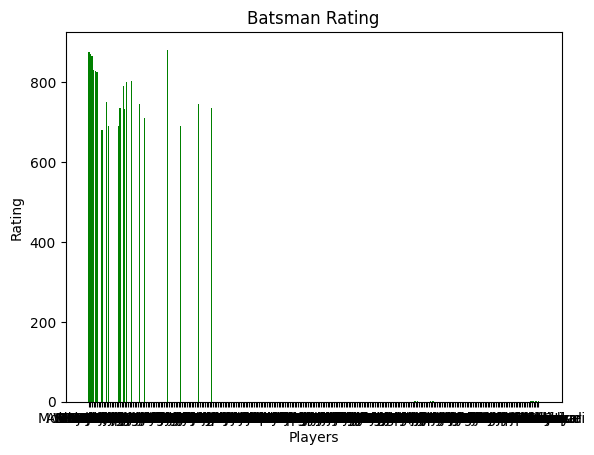

In [9]:

import matplotlib.pyplot as plt

  
  
# Initialize the lists for X and Y
data = pd.read_csv('BatsmanRatingnew.csv')
  
df = pd.DataFrame(data)
  
X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Batsman Rating")
plt.xlabel("Players")
plt.ylabel("Rating")
  
# Show the plot
plt.show()

In [1]:
#Batting Rating
import numpy as np

dataArray = np.genfromtxt('battingFeaturesRating.csv', delimiter=',', names=True)

plt.figure()
for col_name in dataArray.dtype.names:
    plt.plot(dataArray[col_name], label=col_name)
plt.legend()
plt.show()


NameError: name 'plt' is not defined

In [11]:
temp =pd.read_csv("battingFeaturesRating.csv")
temp.head()
battingFeatures["Rating"] = temp["Rating"]
battingFeatures = battingFeatures.sort_values(by=['Rating'], ascending=False)
battingFeatures = battingFeatures.reset_index(drop=True)
batfeat = battingFeatures
battingFeatures



,Player,Matches Played,Innings Batted,Not Outs,Runs,Highest Score,Batting Avg,Balls Faced,Strike Rate,Centuries,Half Centuries,Ducks,Rating
0,V Kohli,216,208,37,10232,183,59.83,11016,92.88,38,48,12,890
1,SE Marsh,60,59,2,2312,151,40.56,2850,81.12,6,12,3,881
2,MS Dhoni,329,278,77,9999,183,49.74,11435,87.44,9,67,9,875
3,CH Gayle,281,276,17,9672,215,37.34,11274,85.79,23,48,23,870
4,AB de Villiers,223,213,39,9427,176,54.17,9308,101.27,25,52,7,865
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Dawlat Zadran,72,49,25,500,47,20.83,624,80.12,0,0,5,0
273,Imad Wasim,32,22,9,480,63,36.92,508,94.48,0,4,1,0
274,B Kumar,95,44,14,440,53,14.66,598,73.57,0,1,7,0
275,MK Pandey,23,18,6,440,104,36.66,479,91.85,1,2,2,0


In [12]:
#Count number of rated players
ratedPlayerCount = len(battingFeatures[battingFeatures.Rating > 0].index)

#Define training and testing data
X_train = battingFeatures.drop(columns=['Player', 'Rating'])
X_test = X_train.iloc[ratedPlayerCount:,:]
X_train = X_train.iloc[:ratedPlayerCount,:]

#store ratings in y_train
y_train = battingFeatures['Rating']
y_train = y_train.iloc[:ratedPlayerCount]


In [13]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor 

regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
print(regr.feature_importances_)
RFresults = regr.predict(X_test)


battingFeatures["Rating"][ratedPlayerCount:] = RFresults








[1.99327466e-02 1.18749855e-01 2.25746058e-05 1.34897436e-01
 1.18764821e-01 1.28512239e-01 1.09631022e-01 9.99502284e-03
 1.30859312e-01 2.28147133e-01 4.87837223e-04]


C:\Users\Saad Alam\AppData\Local\Temp\ipykernel_7720\2700224817.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  battingFeatures["Rating"][ratedPlayerCount:] = RFresults


In [14]:
battingFeatures = battingFeatures.sort_values(by=['Rating'], ascending=False)
battingFeatures = battingFeatures.reset_index(drop=True)
battingFeatures







,Player,Matches Played,Innings Batted,Not Outs,Runs,Highest Score,Batting Avg,Balls Faced,Strike Rate,Centuries,Half Centuries,Ducks,Rating
0,V Kohli,216,208,37,10232,183,59.83,11016,92.88,38,48,12,890.0
1,SE Marsh,60,59,2,2312,151,40.56,2850,81.12,6,12,3,881.0
2,MS Dhoni,329,278,77,9999,183,49.74,11435,87.44,9,67,9,875.0
3,CH Gayle,281,276,17,9672,215,37.34,11274,85.79,23,48,23,870.0
4,AB de Villiers,223,213,39,9427,176,54.17,9308,101.27,25,52,7,865.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,BB Chari,10,10,0,131,39,13.10,305,42.95,0,0,0,1.0
273,TS Chisoro,18,15,6,134,42,14.88,218,61.46,0,0,2,1.0
274,Umar Amin,16,16,1,271,59,18.06,392,69.13,0,1,0,1.0
275,RP Burl,13,11,2,139,30,15.44,224,62.05,0,0,1,1.0


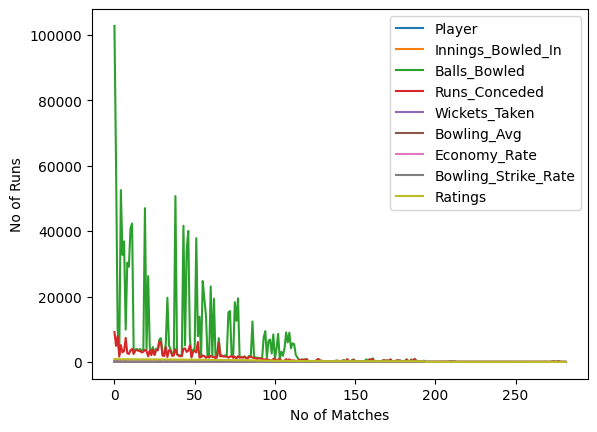

In [2]:

import matplotlib.pyplot as plt
import numpy as np

dataArray = np.genfromtxt('bowlingFeatureFinal.csv', delimiter=',', names=True)

plt.figure()
for col_name in dataArray.dtype.names:
    plt.plot(dataArray[col_name], label=col_name)
plt.xlabel("No of Matches")
plt.ylabel("No of Runs")    
plt.legend()
plt.show()


In [16]:
bowling=pd.read_csv("bowlingFeatureFinal.csv")
bowling


,Player,Innings Bowled In,Balls Bowled,Runs Conceded,Wickets Taken,Bowling Avg,Economy Rate,Bowling Strike Rate,Ratings
0,SL Malinga,207,102732,9145,318,28.75,5.34,32.3,874.000000
1,DW Steyn,118,60138,4893,190,25.75,4.88,31.6,861.000000
2,Mashrafe Mortaza,200,10005,7985,257,31.07,4.78,38.9,856.000000
3,JJ Bumrah,44,2212,1639,78,21.01,4.44,28.3,835.000000
4,NLTC Perera,139,52524,5148,165,31.20,5.87,31.8,812.626938
...,...,...,...,...,...,...,...,...,...
277,Abul Hasan,7,216,244,0,0.00,6.77,0.0,1.000000
278,MS Chapman,0,0,0,0,0.00,0.00,0.0,1.000000
279,C Jonker,0,0,0,0,0.00,0.00,0.0,1.000000
280,TL Seifert,0,0,0,0,0.00,0.00,0.0,1.000000


In [17]:
Final = pd.merge(battingFeatures, bowling, how='inner', on = 'Player')
Final=Final.drop(columns=['Matches Played','Innings Batted','Not Outs','Runs','Highest Score','Batting Avg','Balls Faced','Strike Rate','Centuries','Half Centuries','Ducks'])
Final=Final.drop(columns=['Innings Bowled In','Balls Bowled','Runs Conceded','Wickets Taken','Bowling Avg','Economy Rate','Bowling Strike Rate'])
Final=Final.rename(index=str, columns={"Rating": "Batting Ratings", "Ratings": "Bowling Ratings"})
Final['Overall Rating']=Final['Batting Ratings']+Final['Bowling Ratings']
Final=Final.sort_values(by=['Overall Rating'], ascending=False)
Final









,Player,Batting Ratings,Bowling Ratings,Overall Rating
26,Shakib Al Hasan,749.617620,810.000000,1559.617620
47,KJ O'Brien,740.611509,809.177818,1549.789327
8,E Chigumbura,803.000000,718.379174,1521.379174
11,Shoaib Malik,800.441251,702.995934,1503.437186
12,JP Duminy,791.000000,712.189174,1503.189174
...,...,...,...,...
229,Fazle Mahmud,1.000000,1.000000,2.000000
270,MS Chapman,1.000000,1.000000,2.000000
260,FA Allen,1.000000,1.000000,2.000000
250,S Kaul,1.000000,1.000000,2.000000


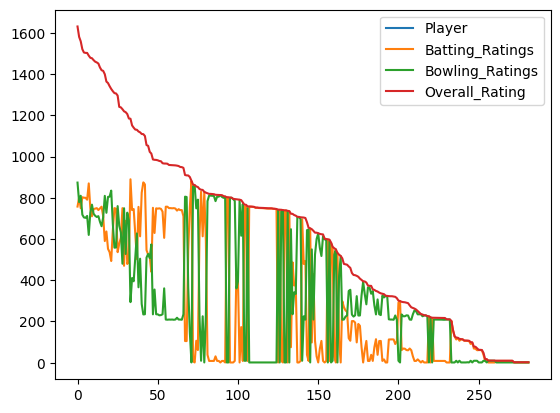

In [18]:

import matplotlib.pyplot as plt
import numpy as np

dataArray = np.genfromtxt('file1.csv', delimiter=',', names=True)

plt.figure()
for col_name in dataArray.dtype.names:
    plt.plot(dataArray[col_name], label=col_name)
plt.xlabel("No of Matches")
plt.ylabel("No of Wickets")  
plt.legend()
plt.show()



In [19]:
import random
Teams={'Karachi Kings':[],'Multan Sultan':[],'Quetta Gladiator':[],'Islamabad United':[],'Lahore Qalandar':[],'Peshawar Zalmi':[]}
Team=[]
FinalList = list(Final['Player'])
count=0
#Snake Draft implementation
for key in Teams:
    Team.append(key)
for i in range(0,6):
    random.shuffle(Team)
    for j in Team:
        Teams[j].append(FinalList[count])
        count=count+1
    print("Order of selection by Snake Draft System is",Team)

    for j in reversed(Team):
        Teams[j].append(FinalList[count])
        count=count+1
    print("Order of selection by Snake Draft System is",Team[::-1])



   


            

Order of selection by Snake Draft System is ['Multan Sultan', 'Karachi Kings', 'Peshawar Zalmi', 'Lahore Qalandar', 'Islamabad United', 'Quetta Gladiator']
Order of selection by Snake Draft System is ['Quetta Gladiator', 'Islamabad United', 'Lahore Qalandar', 'Peshawar Zalmi', 'Karachi Kings', 'Multan Sultan']
Order of selection by Snake Draft System is ['Karachi Kings', 'Quetta Gladiator', 'Islamabad United', 'Peshawar Zalmi', 'Multan Sultan', 'Lahore Qalandar']
Order of selection by Snake Draft System is ['Lahore Qalandar', 'Multan Sultan', 'Peshawar Zalmi', 'Islamabad United', 'Quetta Gladiator', 'Karachi Kings']
Order of selection by Snake Draft System is ['Lahore Qalandar', 'Quetta Gladiator', 'Peshawar Zalmi', 'Islamabad United', 'Karachi Kings', 'Multan Sultan']
Order of selection by Snake Draft System is ['Multan Sultan', 'Karachi Kings', 'Islamabad United', 'Peshawar Zalmi', 'Quetta Gladiator', 'Lahore Qalandar']
Order of selection by Snake Draft System is ['Islamabad United',

In [20]:
FinalTeams=pd.DataFrame.from_dict(Teams)

FinalTeams



,Karachi Kings,Multan Sultan,Quetta Gladiator,Islamabad United,Lahore Qalandar,Peshawar Zalmi
0,KJ O'Brien,Shakib Al Hasan,CH Gayle,JP Duminy,Shoaib Malik,E Chigumbura
1,SC Williams,Sikandar Raza,BA Stokes,MN Samuels,Mahmudullah,Mohammad Hafeez
2,AD Mathews,NLTC Perera,MM Ali,RA Jadeja,Mohammad Nabi,JO Holder
3,H Masakadza,KS Williamson,CR Woakes,MR Marsh,PR Stirling,SK Raina
4,V Kohli,Mashrafe Mortaza,JE Root,Samiullah Shinwari,GJ Maxwell,AD Russell
5,Nasir Hossain,JDS Neesham,MS Dhoni,CJ Chibhabha,AB de Villiers,RG Sharma
6,MJ Santner,AG Cremer,Rahmat Shah,SPD Smith,SL Malinga,Gulbadin Naib
7,CL White,AT Rayudu,DW Steyn,AJ Finch,SC Williams,F du Plessis
8,Fakhar Zaman,Dawlat Zadran,MJ Guptill,BRM Taylor,F Behardien,Azhar Ali
9,MA Starc,Soumya Sarkar,LE Plunkett,Rubel Hossain,A Balbirnie,RAS Lakmal
